#Image classification

Creating an image classifier for the Cifar10 dataset using tensorflow and keras.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sys
sys.path.insert(0,"/content/gdrive/MyDrive/data_science_projects/data_science_projects_2022/cifar10_image_classification/modules/")

In [ ]:
from import_data import get_data, get_train_test_data, normalise_data
from create_pipeline import create_pipeline

In [3]:
%load_ext autoreload
%autoreload 2

from import_data import get_data, get_train_test_data, normalise_data
from create_pipeline import create_pipeline
from image_classification_model import create_model, compile_model, compile_model2, train_model

from tensorflow.keras.layers import Conv2D, Dense, Input, Flatten
from tensorflow import keras


In [12]:
def main ():
    from tensorflow.keras.datasets import cifar10
    raw_data = get_data (cifar10)

    Xy_data = get_train_test_data (raw_data)

    Xy_data_normalised = normalise_data (Xy_data)

    return Xy_data_normalised

In [31]:
def main2 ():
    '''Function for running the model from importing the data to training and 
    evalution.'''
    from tensorflow.keras.datasets import cifar10
    data_model = create_pipeline ([
                                   get_data, 
                                   get_train_test_data, 
                                   normalise_data, 
                                   create_model (
                                       input_layer = Input (shape = (32, 32, 3)), 
                                       hidden_layers = [Flatten (),
                                                        Dense (64, activation = "relu"), 
                                                        Dense (64, activation = "relu"), 
                                                        Dense (10)
                                                        ]
                                                 ),
                                   compile_model2 (optimizer = "Adam",
                                                  loss = "sparse_categorical_crossentropy",
                                                  metrics = ["accuracy", "sparse_categorical_accuracy"]),
                                   train_model (batch_size = 32, epochs = 5)
                                   ])   #   This is a function
                                   #   Not sure if this is the best way to do 
                                   #   this. Maybe it would be better to create 
                                   #   the model and then add the returned 
                                   #   function to the pipeline.

                        #   The 'Flatten' layer is need. It reshapes the data so
                        #   the following layers output shape is one dimension. 
                        #   This is needed so the model will output the label
                        #   for each photo in the dataset. The output shape for
                        #   the end of the model is (None, 10), 10 being the 10
                        #   labels in the dataset. Without the 'Flatten' layer
                        #   the output shape of the model is (None, 32, 32, 10).
                        #   This results in a error due to the output having a 
                        #   different shape to the labels in 'y.' So, the 
                        #   'Flatten' causes the model to output a digit, which
                        #   corresponds to the label.

    data_n_model = data_model (cifar10)   #   initializing function


    return data_n_model

#### Before compile

In [5]:
test_data = main2 ()

170508288/170498071 [==============================] - 4s 0us/step
Model compiled for compile_model2


In [6]:
test_data.model.summary ()

Model: "cifar10_first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 201,482
Trainable params: 201,482
Non-trainable params: 0
_________________________________________________________________


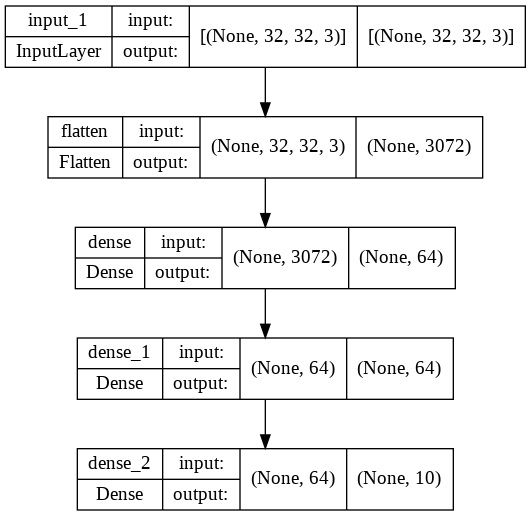

In [7]:
keras.utils.plot_model (test_data.model, show_shapes = True)

In [9]:
display (test_data._fields,
         test_data.data_raw._fields,
         test_data.data_normalised._fields)

('data_raw', 'data_normalised', 'model')

('X_train', 'y_train', 'X_test', 'y_test')

('X_train_norm', 'y_train', 'X_test_norm', 'y_test')

#### After compile

In [21]:
test_data_model = main2 ()

Model compiled for compile_model2


In [22]:
test_data_model.model.compiled_loss._losses

'sparse_categorical_crossentropy'

In [23]:
test_data_model.model.compiled_metrics._metrics

['accuracy', 'sparse_categorical_accuracy']

In [24]:
test_data_model.model.optimizer

In [12]:
def model_compile_info (data_model):
    '''Get information on the compiled model.'''

    print (data_model.model.compiled_loss._losses, "\n",
           data_model.model.compiled_metrics._metrics, "\n",
           data_model.model.optimizer)

#### Training

In [32]:
train_model_n_data = main2 ()

Model compiled for compile_model2
Start model training.
Epoch 1/5
1563/1563 [==============================] - 6s 3ms/step - loss: 9.6639 - accuracy: 0.1001 - sparse_categorical_accuracy: 0.1001
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 10.7380 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 11.7387 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 13.7268 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 14.5064 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Completed model training.


In [27]:
train_model_n_data._fields

('data_raw', 'data_normalised', 'model')

In [33]:
train_model_n_data.model.weights

[<tf.Variable 'dense_15/kernel:0' shape=(3072, 64) dtype=float32, numpy=
 array([[ 0.01767554, -0.00311698, -0.01386832, ..., -0.0111188 ,
          0.03207501, -0.04796311],
        [ 0.01294645, -0.04239921, -0.04965889, ..., -0.03555208,
          0.03749285,  0.00951387],
        [ 0.02868649,  0.02487459, -0.00624579, ..., -0.02745948,
         -0.04653767, -0.00446126],
        ...,
        [-0.031469  , -0.00870004,  0.00049587, ..., -0.00302975,
          0.0047041 , -0.01624839],
        [-0.00963704,  0.01986111, -0.04277346, ...,  0.03965173,
          0.02628143,  0.00013352],
        [-0.00255378, -0.00933339,  0.0109368 , ...,  0.00326717,
         -0.00571768,  0.03188377]], dtype=float32)>,
 <tf.Variable 'dense_15/bias:0' shape=(64,) dtype=float32, numpy=
 array([-3.7914119e-03, -1.5660485e-02, -6.0050664e-03,  2.6175011e-02,
        -2.3665412e-03, -6.0052210e-03, -6.0054692e-03, -6.0050655e-03,
        -2.5769128e-03, -6.0053826e-03, -6.0054660e-03, -1.4814376e-02,
  